In [2]:
import time
import pandas as pd
import psycopg2
import datetime
from tqdm import trange
import matplotlib.pyplot as plt 
import matplotlib as mpl 
# %matplotlib inline 
import platform
import numpy as np
from matplotlib import font_manager, rc # plt.rcParams['axes.unicode_minus'] = False 
if platform.system() == 'Darwin': rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': 
    path = "c:/Windows/Fonts/malgun.ttf" 
    font_name = font_manager.FontProperties(fname=path).get_name() 
    rc('font', family=font_name) 
else: 
    print('Unknown system... sorry~~~~')
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
from tqdm import tqdm
from tqdm import trange

In [3]:
    # row 생략 없이 출력
pd.set_option('display.max_rows', 1000)
# col 생략 없이 출력
pd.set_option('display.max_columns', 1000)
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2

In [4]:
# 전체 매장 입출판재
total_shop_stock = pd.read_csv("total_shop_stock.csv")
total_shop_stock = total_shop_stock.iloc[ :,1:]

In [5]:
# 매장정보
shop_info_pd = pd.read_csv("shop_info_pd.csv")
shop_info_pd = shop_info_pd.iloc[ :,1:]

In [6]:
# bucket_dwalker 관련 매장입출판재(2019)
bucket_dwalker = pd.read_csv('bucket_dwalker.csv')
bucket_dwalker = bucket_dwalker.iloc[ :,1:]

In [7]:
# bucket_dwalker_v2 관련 매장입출판재
bucket_dwalker_v2 = pd.read_csv('bucket_dwalker_v2.csv')
bucket_dwalker_v2 = bucket_dwalker_v2.iloc[ :,1:]

In [8]:
# 아울렛 상설을 제외한 매장키 
shop_list_pd = pd.read_csv('shop_list.csv')
shop_list_pd = shop_list_pd.iloc[ :,1:]

In [178]:
# 전체 매장 비어있는 주차 채운 데이터 (버킷 디워커 기준)
shop_weeks_buket_df = pd.read_csv('shop_weeks_buket.csv')
shop_weeks_buket_df = shop_weeks_buket_df.iloc[ :,1:]

In [57]:
# 전체 매장 비어있는 주차 채운 데이터 (버킷 디워커 v2 기준)

shop_weeks_buket_v2_df = pd.read_csv('shop_weeks_buket_v2.csv')
shop_weeks_buket_v2_df = shop_weeks_buket_v2_df.iloc[ :,1:]

In [10]:
# 전체 매장 비어있는것 채워넣은 입출판재 합쳐 놓은 것
shop_total_sales = pd.read_csv("shop_total_sales.csv")
shop_total_sales = shop_total_sales.iloc[ :,1:]

In [11]:
shop_total_sales

,shopkey,총 판매량(2019),총 입고량(2019),총 판매량(2020),총 입고량(2020),판매수량 비율(20/19),입고수량 비율(20/19),판매 비율(19/19),판매 비율(20/20)
0,X10070,2842,4298,8776,11012,3.087966,2.562122,0.661238,0.796949
1,X10057,2842,4881,7257,9722,2.553483,1.991805,0.582258,0.746451
2,X10050,5668,8376,14182,17873,2.502117,2.133835,0.676695,0.793487
3,X10027,2984,4782,7036,11932,2.357909,2.495190,0.624007,0.589675
4,X10006,4823,6728,11168,13899,2.315571,2.065844,0.716855,0.803511
5,X50057,797,2074,1839,3064,2.307403,1.477338,0.384282,0.600196
6,X10064,3726,5409,8488,10827,2.278046,2.001664,0.688852,0.783966
7,X50001,1824,3257,4049,5758,2.219846,1.767885,0.560025,0.703196
8,X10056,1611,2841,3433,4801,2.130975,1.689898,0.567054,0.715059
9,X50005,1035,2311,2181,3444,2.107246,1.490264,0.447858,0.633275


# 전처리 작업

## 1.원하는 상품 관련 빠져있는 주차 채워주는 전처리

In [12]:
# 빠져있는 주차 채워주는 로직 (원하는 상품 관련)

def zero_fill(shopkey, base, scskey_list,item):
    total=[]
    for col in base.columns:
        base[col].values[:] = 0
    for scskey in scskey_list:
        for shop in shopkey:
            frame = base.reset_index()
            target = item[(item['scskey']==scskey) & (item['shopkey']==shop )].groupby('weekkey').sum().reset_index()
            target = target.reset_index()

            for i in range(0,len(target)):
                for j in range(0,len(frame)):
                        if target.iloc[i].weekkey == frame.iloc[j].weekkey:
                            frame.iloc[j] = target.iloc[i]
                            break
            for i in range(1,len(frame)):
                if frame.iloc[i].takeout_qty ==0 and frame.iloc[i].sale_qty==0:
                    frame.iloc[i] = [ frame.iloc[i]['weekkey'], 0, frame.iloc[i-1]['takeout_qty'], 0, frame.iloc[i-1]['sale_qty'], frame.iloc[i-1]['stock_qty']]
            frame['shopkey'] =shop
            frame['ratio'] = 0
            for i in range(0,len(frame)):
                total_sale_qty= frame['week_sale_qty'].sum()
                a = frame.iloc[i]
                if a['sale_qty']==0 :
                    frame.iloc[i] = [a[0],a[1] ,a[2] ,a[3] ,a[4] ,a[5],a[6] , 0]
                else:
                    if a['sale_qty'] / total_sale_qty > 1:
                        frame.iloc[i] = [a[0],a[1] ,a[2] ,a[3] ,a[4] ,a[5],a[6] , 1]
                    else:
                        frame.iloc[i] = [a[0],a[1] ,a[2] ,a[3] ,a[4] ,a[5],a[6] , a['sale_qty'] / total_sale_qty]
            else:
                frame['scskey']=scskey
            frame = pd.merge(frame, shop_info_pd, left_on='shopkey', right_on='shopkey', how='inner')
            total.append(frame)
    return total


In [ ]:
# 2019  /버킷 디워커 230~ 270 사이즈 / BE 컬러 관련 매장 입출판재컬러 관련 매장 입출판재
scskey_list = ['X19SDXSH09911BE230','X19SDXSH09911BE235','X19SDXSH09911BE240','X19SDXSH09911BE260','X19SDXSH09911BE265','X19SDXSH09911BE270']
frame = bucket_dwalker[(bucket_dwalker['scskey']=='X19SDXSH09911BE240')][['shopkey','weekkey','week_takeout_qty','takeout_qty','week_sale_qty','sale_qty','stock_qty']].groupby('weekkey').sum()
bucket_dwalker_shop_key = bucket_dwalker['shopkey'].unique()


shop_weeks_buket = zero_fill(bucket_dwalker_shop_key, frame,scskey_list,)

In [ ]:
shop_weeks_buket_df = pd.concat(shop_weeks_buket)


In [ ]:
# 2020  /버킷 디워커 V2 230~ 270 사이즈 / BE 컬러 관련 매장 입출판재컬러 관련 매장 입출판재

scskey_list = ['X20SDXSHA5011OW230','X20SDXSHA5011OW235','X20SDXSHA5011OW240','X20SDXSHA5011OW260','X20SDXSHA5011OW265','X20SDXSHA5011OW270']
frame = bucket_dwalker_v2[(bucket_dwalker_v2['scskey']=='X20SDXSHA5011OW240')][['shopkey','weekkey','week_takeout_qty','takeout_qty','week_sale_qty','sale_qty','stock_qty']].groupby('weekkey').sum()
bucket_dwalker_v2_shop_key = bucket_dwalker_v2['shopkey'].unique()


shop_weeks_buket_v2 = zero_fill(bucket_dwalker_v2_shop_key, frame,scskey_list,bucket_dwalker_v2)

In [ ]:
shop_weeks_buket_v2_df = pd.concat(shop_weeks_buket_v2)

In [16]:
shop_weeks_buket

,weekkey,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,stock_qty,shopkey,ratio,scskey,shop_nm,shop_nm_sfdc,repr_shopcode,type_shop_nm,type_contract_nm,type_zone_nm,region_nm
0,2018-12-31,0,0,0,0,0,X10056,0.000000,X19SDXSH09911BE230,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
1,2019-01-07,0,0,0,0,0,X10056,0.000000,X19SDXSH09911BE230,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
2,2019-01-14,0,0,0,0,0,X10056,0.000000,X19SDXSH09911BE230,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
3,2019-01-21,0,0,0,0,0,X10056,0.000000,X19SDXSH09911BE230,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
4,2019-01-28,0,0,0,0,0,X10056,0.000000,X19SDXSH09911BE230,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45469,2019-12-02,0,29,1,26,3,X50002,0.928571,X19SDXSH09911BE270,대전은행(대-위),디스커버리 대전은행점,XH0002,일반매장,대리점,대리점,대전
45470,2019-12-09,0,29,0,26,3,X50002,0.928571,X19SDXSH09911BE270,대전은행(대-위),디스커버리 대전은행점,XH0002,일반매장,대리점,대리점,대전
45471,2019-12-16,0,29,1,27,2,X50002,0.964286,X19SDXSH09911BE270,대전은행(대-위),디스커버리 대전은행점,XH0002,일반매장,대리점,대리점,대전
45472,2019-12-23,0,29,1,28,1,X50002,1.000000,X19SDXSH09911BE270,대전은행(대-위),디스커버리 대전은행점,XH0002,일반매장,대리점,대리점,대전


## 2.전체 매장에 대한 입출판재 구하기

In [ ]:
df_INNER_JOIN = pd.merge(shop_list_pd, total_shop_stock, left_on='shopkey', right_on='shopkey', how='inner')

In [ ]:
shop_stock_2019 = df_INNER_JOIN[(df_INNER_JOIN['weekkey']< '20200101') & (df_INNER_JOIN['weekkey']> '20181231') ]
shop_stock_2020 = df_INNER_JOIN[df_INNER_JOIN['weekkey']> '20191231' ]

In [ ]:
# 실제 매장 입고량과 판매량 구하는 로직(2019)
shop_stock_key_2019 = shop_stock_2019['shopkey'].unique()

total_sum_salty_2019 = []
total_sum_takeout_2019 = []
total_return_salty_2019=[]
total_sum_take_ware_2019=[]

for i in trange(0,len(shop_stock_key_2019)):
    takeout_qty = 0
    sale_qty = 0
    take_ware = 0
    return_salty=0
    
    shop_stock= shop_stock_2019[shop_stock_2019['shopkey']==shop_stock_key_2019[i]]
    shop_scs_key_2019 = shop_stock['scskey'].unique()
    for j in shop_scs_key_2019:
        takeout_qty+= shop_stock[shop_stock['scskey']==j]['takeout_qty'].max()
        sale_qty+= shop_stock[shop_stock['scskey']==j]['sale_qty'].max()
        take_ware += int(shop_stock[(shop_stock['scskey']==j)&(shop_stock['week_takeout_qty']<0)]['week_takeout_qty'].sum())
        return_salty += int(shop_stock[(shop_stock['scskey']==j)&(shop_stock['week_sale_qty']<0)]['week_sale_qty'].sum())
    total_sum_takeout_2019.append(takeout_qty)
    total_sum_salty_2019.append(sale_qty)
    total_sum_take_ware_2019.append(take_ware)
    total_return_salty_2019.append(return_salty)
df3 = pd.DataFrame([ x for x in zip(shop_stock_key_2019,total_sum_salty_2019,total_sum_takeout_2019,total_sum_take_ware_2019,total_return_salty_2019)])
df3.columns = ['shopkey','salty2019','takeout2019','take_ware2019','return_salty2019']
df3['salty2019'] = df3['salty2019'] + df3['return_salty2019']
print(df3)

In [ ]:
# 실제 매장 입고량과 판매량 구하는 로직(2020)

shop_stock_key_2020 = shop_stock_2020['shopkey'].unique()

total_sum_salty2020 = []
total_sum_takeout2020 = []
total_return_salty2020=[]
total_sum_take_ware2020=[]

for i in trange(0,len(shop_stock_key_2020)):
    takeout_qty = 0
    sale_qty = 0
    take_ware = 0
    return_salty=0
    
    shop_stock= shop_stock_2020[shop_stock_2020['shopkey']==shop_stock_key_2020[i]]
    shop_scs_key_2020 = shop_stock['scskey'].unique()
    for j in shop_scs_key_2020:
        takeout_qty+= shop_stock[shop_stock['scskey']==j]['takeout_qty'].max()
        sale_qty+= shop_stock[shop_stock['scskey']==j]['sale_qty'].max()
        take_ware += int(shop_stock[(shop_stock['scskey']==j)&(shop_stock['week_takeout_qty']<0)]['week_takeout_qty'].sum())
        return_salty += int(shop_stock[(shop_stock['scskey']==j)&(shop_stock['week_sale_qty']<0)]['week_sale_qty'].sum())
    total_sum_takeout2020.append(takeout_qty)
    total_sum_salty2020.append(sale_qty)
    total_sum_take_ware2020.append(take_ware)
    total_return_salty2020.append(return_salty)
df4 = pd.DataFrame([ x for x in zip(shop_stock_key_2020,total_sum_salty2020,total_sum_takeout2020,total_sum_take_ware2020,total_return_salty2020)])
df4.columns = ['shopkey','salty2020','takeout2020','take_ware2020','return_salty2020']
df4['salty2020'] = df4['salty2020'] + df4['return_salty2020']
df4

# 버킷디워커와 버킷디워커v2로 판매 비율 구하는 부분

In [60]:
# 전체 매장 평균 판매 비율 buket_v2
v2_department_weeks_mean = shop_weeks_buket_v2_df[shop_weeks_buket_v2_df['type_zone_nm']=='백화점'].groupby('weekkey').mean()
v2_agency_weeks_mean = shop_weeks_buket_v2_df[shop_weeks_buket_v2_df['type_zone_nm']=='대리점'].groupby('weekkey').mean()

In [61]:
# 전체 매장 평균 판매 비율 buket_v2
v2_department_weeks_mean = v2_department_weeks_mean.reset_index()
v2_agency_weeks_mean = v2_agency_weeks_mean.reset_index()
v2_department_weeks_mean['weekkey'] = pd.to_datetime(v2_department_weeks_mean['weekkey'])
v2_agency_weeks_mean['weekkey'] = pd.to_datetime(v2_agency_weeks_mean['weekkey'])

In [62]:
v2_department_weeks_mean = v2_department_weeks_mean.set_index('weekkey')
v2_agency_weeks_mean = v2_agency_weeks_mean.set_index('weekkey')

In [63]:
v2_department_weeks_mean

,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,stock_qty,ratio
weekkey,,,,,,
2019-11-18,1.820896,1.820896,0.243781,0.243781,1.577114,0.006536
2019-11-25,0.619403,2.440299,0.475124,0.718905,1.721393,0.020200
2019-12-02,0.858209,3.298507,0.639303,1.358209,1.940299,0.039245
2019-12-09,0.741294,4.039801,0.646766,2.004975,2.034826,0.055812
2019-12-16,1.129353,5.169154,0.942786,2.947761,2.221393,0.084578
2019-12-23,0.818408,5.987562,0.902985,3.850746,2.136816,0.109595
2019-12-30,0.937811,6.925373,0.721393,4.572139,2.353234,0.130038
2020-01-06,0.796020,7.721393,0.818408,5.390547,2.330846,0.153647
2020-01-13,1.228856,8.950249,0.708955,6.099502,2.850746,0.172599


In [198]:
v2_total_shop_ratio = []
for shop_key in shop_weeks_buket_v2_df['shopkey'].unique():
#     shop_weeks_df[shop_weeks_df['shopkey'] == department_weeks_key[0]]
    shop_week = shop_weeks_buket_v2_df[shop_weeks_buket_v2_df['shopkey']== shop_key].groupby('weekkey').sum()
    shop_week = shop_week.reset_index()
    shop_week['weekkey'] = pd.to_datetime(shop_week['weekkey'])
    
    
    
    
    shop_week['ratio'] = 0
    shop_week['shopkey'] = 0
#     break
    for i in range(0,len(shop_week)):
        total_sale_qty= shop_week['week_sale_qty'].sum()
        a = shop_week.iloc[i]
        if a['sale_qty']==0 :
            shop_week.iloc[i] = [a[0],a[1],a[2] ,a[3] ,a[4] ,a[5], 0,shop_key]
        else:
            if a['sale_qty'] / total_sale_qty > 1:
                shop_week.iloc[i] = [a[0],a[1] ,a[2] ,a[3] ,a[4] ,a[5], 1,shop_key]
            else:
                shop_week.iloc[i] = [a[0],a[1] ,a[2] ,a[3] ,a[4] ,a[5],a['sale_qty'] / total_sale_qty,shop_key]
    v2_total_shop_ratio.append(shop_week)

#     print(shop_key)
#     plt.plot(shop_week['weekkey'], shop_week['sale_qty'],'r')
#     plt.plot(shop_week['weekkey'], shop_week['takeout_qty'],'b')
#     plt.legend(['sale_qty','takeout_qty'])
#     plt.xlabel('주')
#     plt.ylabel('수량')
#     plt.show()

In [199]:
v2_total_shop_ratio = pd.concat(v2_total_shop_ratio)


In [200]:
v2_total_shop_ratio

,weekkey,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,stock_qty,ratio,shopkey
0,2019-11-18,6,6,0,0,6,0.000000,X10056
1,2019-11-25,0,6,1,1,5,0.013333,X10056
2,2019-12-02,5,11,3,4,7,0.053333,X10056
3,2019-12-09,2,13,1,5,8,0.066667,X10056
4,2019-12-16,2,15,0,5,10,0.066667,X10056
...,...,...,...,...,...,...,...,...
54,2020-11-30,0,118,0,92,26,0.929293,X50002
55,2020-12-07,0,118,0,92,26,0.929293,X50002
56,2020-12-14,0,118,3,95,23,0.959596,X50002
57,2020-12-21,0,118,1,96,22,0.969697,X50002


In [175]:
shop_week

,weekkey,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,stock_qty,ratio
0,2019-11-18,6,6,0,0,6,0
1,2019-11-25,0,6,1,1,5,0
2,2019-12-02,5,11,3,4,7,0
3,2019-12-09,2,13,1,5,8,0
4,2019-12-16,2,15,0,5,10,0
5,2019-12-23,3,18,4,9,9,0
6,2019-12-30,3,21,0,9,12,0
7,2020-01-06,0,21,0,9,12,0
8,2020-01-13,1,22,2,11,11,0
9,2020-01-20,3,25,1,12,13,0


In [68]:
# 전체 매장 평균 판매 비율 buket
bk_department_weeks_mean = shop_weeks_buket_df[shop_weeks_buket_df['type_zone_nm']=='백화점'].groupby('weekkey').mean()
bk_agency_weeks_mean = shop_weeks_buket_df[shop_weeks_buket_df['type_zone_nm']=='대리점'].groupby('weekkey').mean()

In [69]:
# 전체 매장 평균 판매 비율 buket
bk_department_weeks_mean = bk_department_weeks_mean.reset_index()
bk_agency_weeks_mean = bk_agency_weeks_mean.reset_index()
bk_department_weeks_mean['weekkey'] = pd.to_datetime(bk_department_weeks_mean['weekkey'])
bk_agency_weeks_mean['weekkey'] = pd.to_datetime(bk_agency_weeks_mean['weekkey'])

In [70]:
bk_department_weeks_mean = bk_department_weeks_mean.set_index('weekkey')
bk_agency_weeks_mean = bk_agency_weeks_mean.set_index('weekkey')

In [195]:
bk_total_shop_ratio = []
for shop_key in shop_weeks_buket_df['shopkey'].unique():
#     shop_weeks_df[shop_weeks_df['shopkey'] == department_weeks_key[0]]
    shop_week = shop_weeks_buket_df[shop_weeks_buket_df['shopkey']== shop_key].groupby('weekkey').sum()
    shop_week = shop_week.reset_index()
    shop_week['weekkey'] = pd.to_datetime(shop_week['weekkey'])
    
    shop_week['ratio'] = 0
    shop_week['shopkey'] = 0
#     break
    for i in range(0,len(shop_week)):
        total_sale_qty= shop_week['week_sale_qty'].sum()
        a = shop_week.iloc[i]
        if a['sale_qty']==0 :
            shop_week.iloc[i] = [a[0],a[1],a[2] ,a[3] ,a[4] ,a[5], 0,shop_key]
        else:
            if a['sale_qty'] / total_sale_qty > 1:
                shop_week.iloc[i] = [a[0],a[1] ,a[2] ,a[3] ,a[4] ,a[5], 1,shop_key]
            else:
                shop_week.iloc[i] = [a[0],a[1] ,a[2] ,a[3] ,a[4] ,a[5],a['sale_qty'] / total_sale_qty,shop_key]
    bk_total_shop_ratio.append(shop_week)
#     break

#     print(shop_key)
#     plt.plot(shop_week['weekkey'], shop_week['sale_qty'],'r')
#     plt.plot(shop_week['weekkey'], shop_week['takeout_qty'],'b')
#     plt.legend(['sale_qty','takeout_qty'])
#     plt.xlabel('주')
#     plt.ylabel('수량')
#     plt.show()

In [196]:
bk_total_shop_ratio = pd.concat(bk_total_shop_ratio)


In [197]:
bk_total_shop_ratio.head(100)

,weekkey,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,stock_qty,ratio,shopkey
0,2018-12-31,4,4,0,0,4,0.000000,X10056
1,2019-01-07,0,4,0,0,4,0.000000,X10056
2,2019-01-14,3,7,1,1,6,0.012195,X10056
3,2019-01-21,0,7,1,2,5,0.024390,X10056
4,2019-01-28,-1,6,1,3,3,0.036585,X10056
5,2019-02-04,0,6,2,5,1,0.060976,X10056
6,2019-02-11,3,9,0,5,4,0.060976,X10056
7,2019-02-18,5,13,5,10,3,0.121951,X10056
8,2019-02-25,2,14,0,10,4,0.121951,X10056
9,2019-03-04,5,19,4,14,5,0.170732,X10056


# 전체 매장 판매량,입고량

In [73]:
shop_total_sales

,shopkey,총 판매량(2019),총 입고량(2019),총 판매량(2020),총 입고량(2020),판매수량 비율(20/19),입고수량 비율(20/19),판매 비율(19/19),판매 비율(20/20)
0,X10070,2842,4298,8776,11012,3.087966,2.562122,0.661238,0.796949
1,X10057,2842,4881,7257,9722,2.553483,1.991805,0.582258,0.746451
2,X10050,5668,8376,14182,17873,2.502117,2.133835,0.676695,0.793487
3,X10027,2984,4782,7036,11932,2.357909,2.495190,0.624007,0.589675
4,X10006,4823,6728,11168,13899,2.315571,2.065844,0.716855,0.803511
5,X50057,797,2074,1839,3064,2.307403,1.477338,0.384282,0.600196
6,X10064,3726,5409,8488,10827,2.278046,2.001664,0.688852,0.783966
7,X50001,1824,3257,4049,5758,2.219846,1.767885,0.560025,0.703196
8,X10056,1611,2841,3433,4801,2.130975,1.689898,0.567054,0.715059
9,X50005,1035,2311,2181,3444,2.107246,1.490264,0.447858,0.633275


In [74]:
shop_total_sales_info = pd.merge(shop_total_sales,shop_info_pd, left_on='shopkey', right_on='shopkey', how='inner')
shop_total_sales_info

,shopkey,총 판매량(2019),총 입고량(2019),총 판매량(2020),총 입고량(2020),판매수량 비율(20/19),입고수량 비율(20/19),판매 비율(19/19),판매 비율(20/20),shop_nm,shop_nm_sfdc,repr_shopcode,type_shop_nm,type_contract_nm,type_zone_nm,region_nm
0,X10070,2842,4298,8776,11012,3.087966,2.562122,0.661238,0.796949,신세계강남,디스커버리 신세계 강남점,XH0260,일반매장,백화점특정,백화점,서울
1,X10057,2842,4881,7257,9722,2.553483,1.991805,0.582258,0.746451,현대목동,디스커버리 현대 목동점,XH0014,일반매장,백화점특정,백화점,서울
2,X10050,5668,8376,14182,17873,2.502117,2.133835,0.676695,0.793487,롯데본점,디스커버리 롯데 본점,XH0248,일반매장,백화점특정,백화점,서울
3,X10027,2984,4782,7036,11932,2.357909,2.495190,0.624007,0.589675,롯데평촌,디스커버리 롯데 평촌점,XH0222,일반매장,백화점특정,백화점,경기
4,X10006,4823,6728,11168,13899,2.315571,2.065844,0.716855,0.803511,AK분당,디스커버리 AK 분당점,XH0100,일반매장,백화점특정,백화점,경기
5,X50057,797,2074,1839,3064,2.307403,1.477338,0.384282,0.600196,여천(대-위),디스커버리 여천점,XH0061,일반매장,대리점,대리점,전남
6,X10064,3726,5409,8488,10827,2.278046,2.001664,0.688852,0.783966,현대천호,디스커버리 현대 천호점,XH0253,일반매장,백화점특정,백화점,서울
7,X50001,1824,3257,4049,5758,2.219846,1.767885,0.560025,0.703196,목포하당(대-위),디스커버리 목포하당점,XH0004,일반매장,대리점,대리점,전남
8,X10056,1611,2841,3433,4801,2.130975,1.689898,0.567054,0.715059,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
9,X50005,1035,2311,2181,3444,2.107246,1.490264,0.447858,0.633275,여수(대-위),디스커버리 여수점,XH0005,일반매장,대리점,대리점,전남


In [75]:
shop_total_sales_info.sort_values('총 판매량(2019)',ascending=False)

,shopkey,총 판매량(2019),총 입고량(2019),총 판매량(2020),총 입고량(2020),판매수량 비율(20/19),입고수량 비율(20/19),판매 비율(19/19),판매 비율(20/20),shop_nm,shop_nm_sfdc,repr_shopcode,type_shop_nm,type_contract_nm,type_zone_nm,region_nm
130,X10008,9047,10927,10499,12509,1.160495,1.144779,0.827949,0.839316,롯데건대,디스커버리 롯데 건대점,XH0200,일반매장,백화점특정,백화점,서울
67,X10060,6590,8481,10269,12451,1.558270,1.468105,0.777031,0.824753,AK수원,디스커버리 AK 수원점,XH0259,일반매장,백화점특정,백화점,경기
142,X10044,6270,7870,4960,6625,0.791069,0.841804,0.796696,0.748679,롯데구리,디스커버리 롯데 구리점,XH0238,일반매장,백화점특정,백화점,경기
52,X10055,5979,8238,9627,12100,1.610135,1.468803,0.725783,0.795620,신세계광주,디스커버리 신세계 광주점,XH0256,일반매장,백화점특정,백화점,광주
87,X10022,5795,7460,8658,10687,1.494047,1.432574,0.776810,0.810143,롯데광주,디스커버리 롯데 광주점,XH0213,일반매장,백화점특정,백화점,광주
131,X10009,5773,7918,6697,9246,1.160055,1.167719,0.729098,0.724313,현대신촌,디스커버리 현대 신촌점,XH0015,일반매장,백화점특정,백화점,서울
2,X10050,5668,8376,14182,17873,2.502117,2.133835,0.676695,0.793487,롯데본점,디스커버리 롯데 본점,XH0248,일반매장,백화점특정,백화점,서울
93,X10018,5612,7260,8215,10473,1.463828,1.442562,0.773003,0.784398,롯데잠실,디스커버리 롯데 잠실점,XH0211,일반매장,백화점특정,백화점,서울
132,X10004,5285,7110,6117,8272,1.157427,1.163432,0.743319,0.739483,롯데영등포,디스커버리 롯데 영등포점,XH0204,일반매장,백화점특정,백화점,서울
82,X10033,5190,7574,7877,11063,1.517726,1.460655,0.685239,0.712013,현대중동,디스커버리 현대 중동점,XH0228,일반매장,백화점특정,백화점,경기


In [77]:
shop_total_sales_info.sort_values('총 판매량(2020)',ascending=False)

,shopkey,총 판매량(2019),총 입고량(2019),총 판매량(2020),총 입고량(2020),판매수량 비율(20/19),입고수량 비율(20/19),판매 비율(19/19),판매 비율(20/20),shop_nm,shop_nm_sfdc,repr_shopcode,type_shop_nm,type_contract_nm,type_zone_nm,region_nm
2,X10050,5668,8376,14182,17873,2.502117,2.133835,0.676695,0.793487,롯데본점,디스커버리 롯데 본점,XH0248,일반매장,백화점특정,백화점,서울
4,X10006,4823,6728,11168,13899,2.315571,2.065844,0.716855,0.803511,AK분당,디스커버리 AK 분당점,XH0100,일반매장,백화점특정,백화점,경기
130,X10008,9047,10927,10499,12509,1.160495,1.144779,0.827949,0.839316,롯데건대,디스커버리 롯데 건대점,XH0200,일반매장,백화점특정,백화점,서울
67,X10060,6590,8481,10269,12451,1.558270,1.468105,0.777031,0.824753,AK수원,디스커버리 AK 수원점,XH0259,일반매장,백화점특정,백화점,경기
52,X10055,5979,8238,9627,12100,1.610135,1.468803,0.725783,0.795620,신세계광주,디스커버리 신세계 광주점,XH0256,일반매장,백화점특정,백화점,광주
30,X10007,5085,7160,9063,11543,1.782301,1.612151,0.710196,0.785151,롯데부산,디스커버리 롯데 부산점,XH0203,일반매장,백화점특정,백화점,부산
26,X10061,5014,6768,9042,11180,1.803351,1.651891,0.740839,0.808766,신세계대구,디스커버리 신세계 대구점,XH0265,일반매장,백화점특정,백화점,대구
0,X10070,2842,4298,8776,11012,3.087966,2.562122,0.661238,0.796949,신세계강남,디스커버리 신세계 강남점,XH0260,일반매장,백화점특정,백화점,서울
87,X10022,5795,7460,8658,10687,1.494047,1.432574,0.776810,0.810143,롯데광주,디스커버리 롯데 광주점,XH0213,일반매장,백화점특정,백화점,광주
6,X10064,3726,5409,8488,10827,2.278046,2.001664,0.688852,0.783966,현대천호,디스커버리 현대 천호점,XH0253,일반매장,백화점특정,백화점,서울


In [78]:
department_total_sales = shop_total_sales_info[shop_total_sales_info['type_zone_nm']=='백화점']
agency_total_sales = shop_total_sales_info[shop_total_sales_info['type_zone_nm']=='대리점']

<AxesSubplot:>

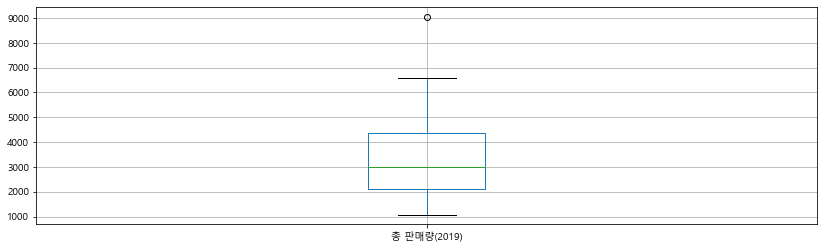

In [82]:
department_total_sales.boxplot(column='총 판매량(2019)')

<AxesSubplot:>

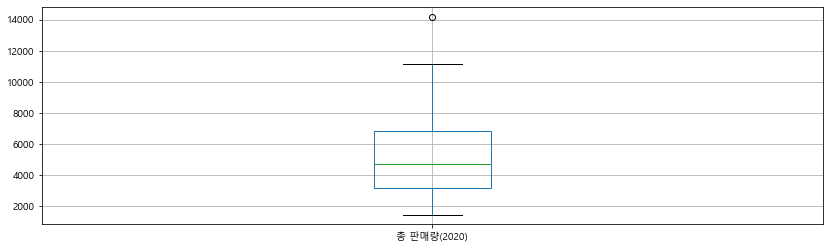

In [83]:
department_total_sales.boxplot(column='총 판매량(2020)')

In [236]:
d_Q1_2019 = department_total_sales['총 판매량(2019)'].quantile(.25)
d_Q3_2019 = department_total_sales['총 판매량(2019)'].quantile(.75)
d_IQR_2019 = d_Q3_2019 - d_Q1_2019
d_Q2_2019 = department_total_sales['총 판매량(2019)'].quantile(.5)
d_Q4_2019 = department_total_sales['총 판매량(2019)'].quantile(1)
d_Q0_2019 = department_total_sales[((department_total_sales['총 판매량(2019)']>d_Q3_2019+1.5*d_IQR_2019))]

In [237]:
d_q4_2019 = department_total_sales[department_total_sales['총 판매량(2019)']<d_Q1_2019]
d_q3_2019 = department_total_sales[(department_total_sales['총 판매량(2019)']>d_Q1_2019)&(department_total_sales['총 판매량(2019)']<d_Q2_2019)]
d_q2_2019 = department_total_sales[(department_total_sales['총 판매량(2019)']>d_Q2_2019)&(department_total_sales['총 판매량(2019)']<d_Q3_2019)]
d_q1_2019 = department_total_sales[(department_total_sales['총 판매량(2019)']>d_Q3_2019)&(department_total_sales['총 판매량(2019)']<d_Q3_2019+1.5*d_IQR_2019)]
d_q0_2019 = department_total_sales[((department_total_sales['총 판매량(2019)']>d_Q3_2019+1.5*d_IQR_2019))]

In [423]:
d_Q1_2020 = department_total_sales['총 판매량(2020)'].quantile(.25)
d_Q3_2020 = department_total_sales['총 판매량(2020)'].quantile(.75)
d_IQR_2020 = d_Q3_2020 - d_Q1_2020
d_Q2_2020 = department_total_sales['총 판매량(2020)'].quantile(.5)
d_Q4_2020 = department_total_sales['총 판매량(2020)'].quantile(1)
d_Q0_2020 = department_total_sales[((department_total_sales['총 판매량(2020)']>d_Q3_2020+1.5*d_IQR_2020))]

In [426]:
d_q4_2020 = department_total_sales[department_total_sales['총 판매량(2020)']<d_Q1_2020]
d_q3_2020 = department_total_sales[(department_total_sales['총 판매량(2020)']>d_Q1_2020)&(department_total_sales['총 판매량(2020)']<d_Q2_2020)]
d_q2_2020 = department_total_sales[(department_total_sales['총 판매량(2020)']>d_Q2_2020)&(department_total_sales['총 판매량(2020)']<d_Q3_2020)]
d_q1_2020 = department_total_sales[(department_total_sales['총 판매량(2020)']>d_Q3_2020)&(department_total_sales['총 판매량(2020)']<d_Q3_2020+1.5*d_IQR_2020)]
d_q0_2020 = department_total_sales[((department_total_sales['총 판매량(2020)']>d_Q3_2020+1.5*d_IQR_2020))]

In [427]:
d_q2_2020

,shopkey,총 판매량(2019),총 입고량(2019),총 판매량(2020),총 입고량(2020),판매수량 비율(20/19),입고수량 비율(20/19),판매 비율(19/19),판매 비율(20/20),shop_nm,shop_nm_sfdc,repr_shopcode,type_shop_nm,type_contract_nm,type_zone_nm,region_nm
12,X10003,2407,3833,4964,6766,2.062318,1.765197,0.627968,0.733668,롯데광복,디스커버리 롯데 광복점,XH0201,일반매장,백화점특정,백화점,부산
13,X10069,3224,4855,6506,8612,2.017990,1.773841,0.664058,0.755458,현대킨텍스,디스커버리 현대 킨텍스점,XH0261,일반매장,백화점특정,백화점,경기
23,X10021,3304,4811,6041,7968,1.828390,1.656205,0.686760,0.758158,신세계아라리오,디스커버리 신세계 아라리오점,XH0215,일반매장,백화점특정,백화점,충남
28,X10032,3305,4701,5946,7863,1.799092,1.672623,0.703042,0.756200,롯데수원,디스커버리 롯데 수원점,XH0242,일반매장,백화점특정,백화점,경기
54,X10014,3276,5028,5272,7327,1.609280,1.457239,0.651551,0.719531,롯데중동,디스커버리 롯데 중동점,XH0210,일반매장,백화점특정,백화점,경기
64,X10035,4029,5754,6309,8486,1.565897,1.474800,0.700209,0.743460,신세계의정부,디스커버리 신세계 의정부점,XH0226,일반매장,백화점특정,백화점,경기
69,X10078,3330,4863,5182,6943,1.556156,1.427720,0.684762,0.746363,신세계김해,디스커버리 신세계 김해점,XH0264,일반매장,백화점특정,백화점,경남
72,X10043,3609,5362,5589,7644,1.548628,1.425587,0.673070,0.731162,롯데울산,디스커버리 롯데 울산점,XH0235,일반매장,백화점특정,백화점,울산
78,X10051,3369,5063,5154,7166,1.529831,1.415366,0.665416,0.719230,롯데안산,디스커버리 롯데 안산점,XH0249,일반매장,백화점특정,백화점,경기
92,X10079,4436,6083,6494,8551,1.463931,1.405721,0.729245,0.759443,신세계하남,디스커버리 신세계 하남점,XH270,일반매장,백화점특정,백화점,경기


In [92]:
d_q1

,shopkey,총 판매량(2019),총 입고량(2019),총 판매량(2020),총 입고량(2020),판매수량 비율(20/19),입고수량 비율(20/19),판매 비율(19/19),판매 비율(20/20),shop_nm,shop_nm_sfdc,repr_shopcode,type_shop_nm,type_contract_nm,type_zone_nm,region_nm
2,X10050,5668,8376,14182,17873,2.502117,2.133835,0.676695,0.793487,롯데본점,디스커버리 롯데 본점,XH0248,일반매장,백화점특정,백화점,서울
4,X10006,4823,6728,11168,13899,2.315571,2.065844,0.716855,0.803511,AK분당,디스커버리 AK 분당점,XH0100,일반매장,백화점특정,백화점,경기
26,X10061,5014,6768,9042,11180,1.803351,1.651891,0.740839,0.808766,신세계대구,디스커버리 신세계 대구점,XH0265,일반매장,백화점특정,백화점,대구
30,X10007,5085,7160,9063,11543,1.782301,1.612151,0.710196,0.785151,롯데부산,디스커버리 롯데 부산점,XH0203,일반매장,백화점특정,백화점,부산
51,X10075,4882,6761,7870,9899,1.612044,1.464133,0.722083,0.795030,신세계본점,디스커버리 신세계 본점,XH266,일반매장,백화점특정,백화점,서울
52,X10055,5979,8238,9627,12100,1.610135,1.468803,0.725783,0.795620,신세계광주,디스커버리 신세계 광주점,XH0256,일반매장,백화점특정,백화점,광주
67,X10060,6590,8481,10269,12451,1.558270,1.468105,0.777031,0.824753,AK수원,디스커버리 AK 수원점,XH0259,일반매장,백화점특정,백화점,경기
82,X10033,5190,7574,7877,11063,1.517726,1.460655,0.685239,0.712013,현대중동,디스커버리 현대 중동점,XH0228,일반매장,백화점특정,백화점,경기
83,X10077,4772,6556,7225,9521,1.514040,1.452257,0.727883,0.758849,신세계센텀,디스커버리 신세계 센텀점,XH267,일반매장,백화점특정,백화점,부산
87,X10022,5795,7460,8658,10687,1.494047,1.432574,0.776810,0.810143,롯데광주,디스커버리 롯데 광주점,XH0213,일반매장,백화점특정,백화점,광주


([<matplotlib.patches.Wedge at 0x26e4b4f4c40>,
 [Text(1.0987909806905718, 0.0515594875173511, '강원'),
  Text(0.7686463552310552, 0.7868816814426517, '경기'),
  Text(-0.17971513354339744, 1.0852200103091902, '경남'),
  Text(-0.47395014253987483, 0.992658683730935, '경북'),
  Text(-0.6084442878662422, 0.9164035948003159, '광주'),
  Text(-0.838953705490461, 0.7114468919348971, '대구'),
  Text(-1.0412772444918716, 0.35460076156632137, '대전'),
  Text(-1.0891347660419954, -0.15422535912958113, '부산'),
  Text(-0.179715076390231, -1.0852200197738953, '서울'),
  Text(0.901888291561796, -0.6297598824502441, '울산'),
  Text(1.0034965255406272, -0.4505493571495687, '전남'),
  Text(1.0412772559044121, -0.3546007280536488, '전북'),
  Text(1.0807088040598822, -0.2051060233817118, '충남'),
  Text(1.0987909821991173, -0.05155945536852736, '충북')],
 [Text(0.59934053492213, 0.02812335682764605, '1.5%'),
  Text(0.41926164830784823, 0.42920818987780995, '22.4%'),
  Text(-0.09802643647821677, 0.5919381874413764, '7.5%'),
  Text(-0

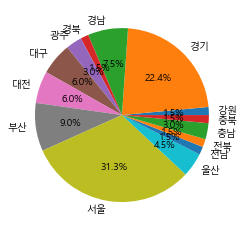

In [93]:
plt.pie(list(department_total_sales.groupby('region_nm').count()['shopkey']), labels=department_total_sales.groupby('region_nm').count()['shopkey'].index, autopct='%.1f%%')

([<matplotlib.patches.Wedge at 0x26e4bf0cbe0>],
 [Text(-1.1, 1.3471114790620887e-16, '서울')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

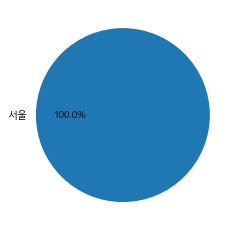

In [95]:
plt.pie(list(d_q0.groupby('region_nm').count()['shopkey']), labels=d_q0.groupby('region_nm').count()['shopkey'].index, autopct='%.1f%%')

([<matplotlib.patches.Wedge at 0x26e4bdad610>,
 [Text(0.6111272563215626, 0.9146165735327998, '경기'),
  Text(-0.7778174593052023, 0.7778174593052024, '광주'),
  Text(-1.0788638084435536, 0.21459935421774148, '대구'),
  Text(-1.0162674857624157, -0.4209517756015987, '부산'),
  Text(0.420951775601599, -1.0162674857624154, '서울')],
 [Text(0.33334213981176136, 0.4988817673815271, '31.2%'),
  Text(-0.42426406871192845, 0.4242640687119285, '12.5%'),
  Text(-0.5884711682419382, 0.11705419320967717, '6.2%'),
  Text(-0.5543277195067721, -0.2296100594190538, '12.5%'),
  Text(0.229610059419054, -0.554327719506772, '37.5%')])

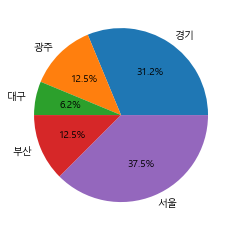

In [96]:
plt.pie(list(d_q1.groupby('region_nm').count()['shopkey']), labels=d_q1.groupby('region_nm').count()['shopkey'].index, autopct='%.1f%%')

([<matplotlib.patches.Wedge at 0x26e4be68df0>,
 [Text(0.42095177560159885, 1.0162674857624154, '경기'),
  Text(-1.0788638084435536, 0.21459935421774148, '경남'),
  Text(-0.9146165735328001, -0.6111272563215622, '대구'),
  Text(-0.6111272563215624, -0.9146165735327998, '대전'),
  Text(-2.0206672185931328e-16, -1.1, '서울'),
  Text(0.7778174593052022, -0.7778174593052025, '울산'),
  Text(1.0788638084435533, -0.21459935421774162, '충남')],
 [Text(0.22961005941905388, 0.5543277195067721, '37.5%'),
  Text(-0.5884711682419382, 0.11705419320967717, '18.8%'),
  Text(-0.49888176738152723, -0.33334213981176114, '6.2%'),
  Text(-0.3333421398117613, -0.4988817673815271, '6.2%'),
  Text(-1.1021821192326178e-16, -0.6, '12.5%'),
  Text(0.4242640687119284, -0.4242640687119286, '12.5%'),
  Text(0.5884711682419381, -0.11705419320967722, '6.2%')])

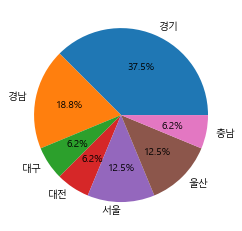

In [97]:
plt.pie(list(d_q2.groupby('region_nm').count()['shopkey']), labels=d_q2.groupby('region_nm').count()['shopkey'].index, autopct='%.1f%%')

([<matplotlib.patches.Wedge at 0x26e4bf42700>,
 [Text(1.0162674857624154, 0.4209517756015988, '경기'),
  Text(0.6111272563215626, 0.9146165735327998, '경남'),
  Text(0.21459935421774118, 1.0788638084435536, '대구'),
  Text(-0.42095177560159874, 1.0162674857624154, '대전'),
  Text(-0.9146165735327999, 0.6111272563215624, '부산'),
  Text(-0.7778174593052025, -0.7778174593052023, '서울'),
  Text(0.6111272563215621, -0.9146165735328001, '울산'),
  Text(0.9146165735327998, -0.6111272563215624, '전남'),
  Text(1.0788638084435533, -0.21459935421774162, '충남')],
 [Text(0.5543277195067721, 0.22961005941905385, '12.5%'),
  Text(0.33334213981176136, 0.4988817673815271, '6.2%'),
  Text(0.117054193209677, 0.5884711682419382, '6.2%'),
  Text(-0.22961005941905382, 0.5543277195067721, '12.5%'),
  Text(-0.4988817673815272, 0.3333421398117613, '6.2%'),
  Text(-0.4242640687119286, -0.42426406871192845, '37.5%'),
  Text(0.3333421398117611, -0.49888176738152723, '6.2%'),
  Text(0.4988817673815271, -0.3333421398117613, '6.2

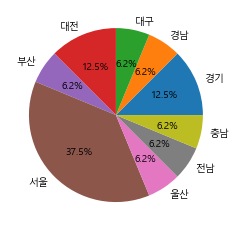

In [98]:
plt.pie(list(d_q3.groupby('region_nm').count()['shopkey']), labels=d_q3.groupby('region_nm').count()['shopkey'].index, autopct='%.1f%%')

([<matplotlib.patches.Wedge at 0x26e4b2dfe20>,
 [Text(1.0812704095131431, 0.20212447034260855, '강원'),
  Text(0.9352388481066135, 0.5790753810966367, '경기'),
  Text(0.6628980969955887, 0.8778189522900649, '경남'),
  Text(0.3010292839807241, 1.0580082089407683, '경북'),
  Text(-0.10149520219603578, 1.0953075932956853, '대구'),
  Text(-0.49031219881092686, 0.9846796167775559, '대전'),
  Text(-1.025719461098691, 0.397365810209448, '부산'),
  Text(-0.3010292220695504, -1.0580082265560138, '서울'),
  Text(0.9352389023235596, -0.5790752935332535, '전북'),
  Text(1.081270428437397, -0.2021243691067659, '충북')],
 [Text(0.5897838597344416, 0.1102497110959683, '5.9%'),
  Text(0.5101302807854254, 0.3158592987799836, '5.9%'),
  Text(0.3615807801794119, 0.4788103376127626, '5.9%'),
  Text(0.16419779126221312, 0.5770953866949645, '5.9%'),
  Text(-0.055361019379655874, 0.5974405054340101, '5.9%'),
  Text(-0.2674430175332328, 0.5370979727877577, '5.9%'),
  Text(-0.5594833424174678, 0.21674498738697162, '17.6%'),
  Tex

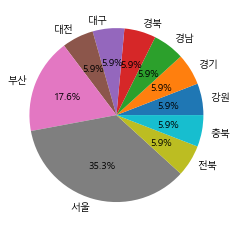

In [99]:
plt.pie(list(d_q4.groupby('region_nm').count()['shopkey']), labels=d_q4.groupby('region_nm').count()['shopkey'].index, autopct='%.1f%%')

## 4분위수 별 판매비율 비교

X10008


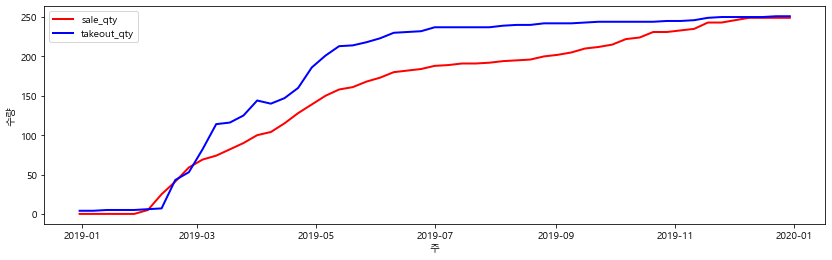

In [103]:
for shop_key in d_q0['shopkey']:
#     shop_weeks_df[shop_weeks_df['shopkey'] == department_weeks_key[0]]
    shop_week = shop_weeks_buket_df[shop_weeks_buket_df['shopkey']== shop_key].groupby('weekkey').sum()
    shop_week = shop_week.reset_index()
    shop_week['weekkey'] = pd.to_datetime(shop_week['weekkey'])

    print(shop_key)
    plt.plot(shop_week['weekkey'], shop_week['sale_qty'],'r')
    plt.plot(shop_week['weekkey'], shop_week['takeout_qty'],'b')
    plt.legend(['sale_qty','takeout_qty'])
    plt.xlabel('주')
    plt.ylabel('수량')
    plt.show()

In [543]:
bk_total_shop_ratio

,weekkey,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,stock_qty,ratio,shopkey
0,2018-12-31,4,4,0,0,4,0.000000,X10056
1,2019-01-07,0,4,0,0,4,0.000000,X10056
2,2019-01-14,3,7,1,1,6,0.012195,X10056
3,2019-01-21,0,7,1,2,5,0.024390,X10056
4,2019-01-28,-1,6,1,3,3,0.036585,X10056
...,...,...,...,...,...,...,...,...
48,2019-12-02,0,189,4,174,15,0.983051,X50002
49,2019-12-09,0,189,0,174,15,0.983051,X50002
50,2019-12-16,0,189,1,175,14,0.988701,X50002
51,2019-12-23,0,189,2,177,12,1.000000,X50002


In [571]:
# 매장별 카운트 
# group_list =[d_q0_2019['shopkey'],d_q1_2019['shopkey'],d_q2_2019['shopkey'],d_q3_2019['shopkey'],d_q4_2019['shopkey']]


count_list = []
for shop_key in bk_total_shop_ratio_info['shopkey'].unique():
    count = 0
    shop_week = bk_total_shop_ratio[bk_total_shop_ratio['shopkey']== shop_key]
#         print(shop_key)
    for i in range(0,len(shop_week)):
        if shop_week.iloc[i]['ratio'] > bk_department_weeks_mean.iloc[i]['ratio']:
            count += 1
    else:
#             print(count)
        count_list.append(count)




In [572]:
shop_bk_count = pd.DataFrame([ x for x in zip(bk_total_shop_ratio_info['shopkey'].unique(),count_list)])
shop_bk_count.columns=['shopkey','ratio_count(2019)']

In [574]:
shop_bk_count

,shopkey,ratio_count(2019)
0,X10056,9
1,X50088,36
2,X50121,52
3,X50077,39
4,X50006,13
5,X50128,39
6,X10046,42
7,X50090,42
8,X50101,44
9,X50089,4


In [551]:
shop_bk_count = pd.merge(shop_bk_count, shop_info_pd, left_on='shopkey', right_on='shopkey', how='inner')

In [556]:
shop_bk_count.to_csv('shop_bk_count.csv')

In [546]:
# 매장별 카운트 
# group_list =[d_q0_2019['shopkey'],d_q1_2019['shopkey'],d_q2_2019['shopkey'],d_q3_2019['shopkey'],d_q4_2019['shopkey']]


count_list = []
for shop_key in v2_total_shop_ratio_info['shopkey'].unique():
    count = 0
    shop_week = v2_total_shop_ratio_info[v2_total_shop_ratio_info['shopkey']== shop_key]
#         print(shop_key)
    for i in range(0,len(shop_week)):
        if shop_week.iloc[i]['ratio'] > v2_department_weeks_mean.iloc[i]['ratio']:
            count += 1
    else:
#             print(count)
        count_list.append(count)

In [559]:
shop_v2_count = pd.DataFrame([ x for x in zip(v2_total_shop_ratio_info['shopkey'].unique(),count_list)])
shop_v2_count.columns=['shopkey','ratio_count(2020)']

In [552]:
shop_v2_count = pd.merge(shop_v2_count, shop_info_pd, left_on='shopkey', right_on='shopkey', how='inner')

In [557]:
shop_v2_count.to_csv('shop_v2_count.csv')

In [582]:
shop_v2_count

,shopkey,ratio_count(2020)
0,X10056,4
1,X50088,12
2,X50121,2
3,X50077,7
4,X50006,55
5,X50128,13
6,X10046,47
7,X50090,55
8,X50101,1
9,X50089,28


In [533]:
bk_total_shop_ratio_info['shopkey'].unique()

array(['X10056', 'X50088', 'X50121', 'X50077', 'X50006', 'X50128',
       'X10046', 'X50090', 'X50101', 'X50089', 'X50131', 'X50024',
       'X10027', 'X10070', 'X10061', 'X50092', 'X50115', 'X10081',
       'X10048', 'X30017', 'X50125', 'X50098', 'X50064', 'X10059',
       'X10065', 'X10058', 'X10003', 'X10005', 'X10029', 'X10068',
       'X50019', 'X10051', 'X10028', 'X50103', 'X50042', 'X50052',
       'X50130', 'X10052', 'X10008', 'X30015', 'X50047', 'X50107',
       'X50091', 'X50081', 'X10050', 'X50117', 'X50023', 'X50129',
       'X10025', 'X10015', 'X10053', 'X10073', 'X50074', 'X50113',
       'X10035', 'X10080', 'X50099', 'X50005', 'X50114', 'X50041',
       'X10060', 'X10076', 'X10067', 'X10022', 'X10016', 'X10064',
       'X50133', 'X50028', 'X10004', 'X10014', 'X50037', 'X10039',
       'X10023', 'X50123', 'X50055', 'X50094', 'X50053', 'X50063',
       'X10063', 'X10011', 'X50069', 'X50110', 'X50111', 'X30026',
       'X50120', 'X10036', 'X10078', 'X50058', 'X50119', 'X100

In [327]:
group_list =[d_q0_2019['shopkey'],d_q1_2019['shopkey'],d_q2_2019['shopkey'],d_q3_2019['shopkey'],d_q4_2019['shopkey']]
for group in group_list:
    count_list = []
    for shop_key in group:
        count = 0
        shop_week = bk_total_shop_ratio[bk_total_shop_ratio['shopkey']== shop_key]
#         print(shop_key)
        for i in range(0,len(shop_week)):
            if shop_week.iloc[i]['ratio'] > bk_department_weeks_mean.iloc[i]['ratio']:
                count += 1
        else:
#             print(count)
            count_list.append(count)
            print(count_list)
    else:
        print(np.mean(count_list))


[38]
38.0
[48]
[48, 28]
[48, 28, 33]
[48, 28, 33, 50]
[48, 28, 33, 50, 46]
[48, 28, 33, 50, 46, 53]
[48, 28, 33, 50, 46, 53, 53]
[48, 28, 33, 50, 46, 53, 53, 29]
[48, 28, 33, 50, 46, 53, 53, 29, 46]
[48, 28, 33, 50, 46, 53, 53, 29, 46, 33]
[48, 28, 33, 50, 46, 53, 53, 29, 46, 33, 36]
[48, 28, 33, 50, 46, 53, 53, 29, 46, 33, 36, 37]
[48, 28, 33, 50, 46, 53, 53, 29, 46, 33, 36, 37, 15]
[48, 28, 33, 50, 46, 53, 53, 29, 46, 33, 36, 37, 15, 49]
[48, 28, 33, 50, 46, 53, 53, 29, 46, 33, 36, 37, 15, 49, 17]
[48, 28, 33, 50, 46, 53, 53, 29, 46, 33, 36, 37, 15, 49, 17, 34]
37.9375
[13]
[13, 50]
[13, 50, 32]
[13, 50, 32, 37]
[13, 50, 32, 37, 22]
[13, 50, 32, 37, 22, 7]
[13, 50, 32, 37, 22, 7, 43]
[13, 50, 32, 37, 22, 7, 43, 52]
[13, 50, 32, 37, 22, 7, 43, 52, 44]
[13, 50, 32, 37, 22, 7, 43, 52, 44, 48]
[13, 50, 32, 37, 22, 7, 43, 52, 44, 48, 17]
[13, 50, 32, 37, 22, 7, 43, 52, 44, 48, 17, 11]
[13, 50, 32, 37, 22, 7, 43, 52, 44, 48, 17, 11, 37]
[13, 50, 32, 37, 22, 7, 43, 52, 44, 48, 17, 11, 37, 5

In [485]:
group_list =[d_q0_2020['shopkey'],d_q1_2020['shopkey'],d_q2_2020['shopkey'],d_q3_2020['shopkey'],d_q4_2020['shopkey']]
count_list = []
groups=[]
for group in group_list:
    for shop_key in group:
        groups.append(shop_key)
        count = 0
        shop_week = v2_total_shop_ratio[v2_total_shop_ratio['shopkey']== shop_key]
#         print(shop_key)
        for i in range(0,len(shop_week)):
            if shop_week.iloc[i]['ratio'] >v2_department_weeks_mean.iloc[i]['ratio']:
                count += 1
        else:
#             print(count)
            count_list.append(count)
#     else:
#         print(np.mean(count_list))


In [486]:
shop_count = pd.DataFrame([ x for x in zip(groups,count_list)])
shop_count.columns=['shopkey','count(2020)']

In [488]:
group_list =[d_q0_2019['shopkey'],d_q1_2019['shopkey'],d_q2_2019['shopkey'],d_q3_2019['shopkey'],d_q4_2019['shopkey']]
count_list = []
groups=[]
for group in group_list:
    for shop_key in group:
        groups.append(shop_key)
        count = 0
        shop_week = bk_total_shop_ratio[bk_total_shop_ratio['shopkey']== shop_key]
#         print(shop_key)
        for i in range(0,len(shop_week)):
            if shop_week.iloc[i]['ratio'] >bk_department_weeks_mean.iloc[i]['ratio']:
                count += 1
        else:
#             print(count)
            count_list.append(count)
#     else:
#         print(np.mean(count_list))


In [489]:
shop_count = pd.DataFrame([ x for x in zip(groups,count_list)])
shop_count.columns=['shopkey','count(2019)']

In [490]:

bk_shop_up_count= pd.merge(bk_shop_up_count, shop_count, left_on='shopkey', right_on='shopkey', how='inner')

In [491]:
bk_shop_up_count

,shopkey,총 판매량(2019),총 입고량(2019),총 판매량(2020),총 입고량(2020),판매수량 비율(20/19),입고수량 비율(20/19),판매 비율(19/19),판매 비율(20/20),shop_nm,shop_nm_sfdc,repr_shopcode,type_shop_nm,type_contract_nm,type_zone_nm,region_nm,count(2020),count(2019)
0,X10070,2842,4298,8776,11012,3.087966,2.562122,0.661238,0.796949,신세계강남,디스커버리 신세계 강남점,XH0260,일반매장,백화점특정,백화점,서울,16,41
1,X10057,2842,4881,7257,9722,2.553483,1.991805,0.582258,0.746451,현대목동,디스커버리 현대 목동점,XH0014,일반매장,백화점특정,백화점,서울,42,47
2,X10050,5668,8376,14182,17873,2.502117,2.133835,0.676695,0.793487,롯데본점,디스커버리 롯데 본점,XH0248,일반매장,백화점특정,백화점,서울,55,48
3,X10006,4823,6728,11168,13899,2.315571,2.065844,0.716855,0.803511,AK분당,디스커버리 AK 분당점,XH0100,일반매장,백화점특정,백화점,경기,11,28
4,X10064,3726,5409,8488,10827,2.278046,2.001664,0.688852,0.783966,현대천호,디스커버리 현대 천호점,XH0253,일반매장,백화점특정,백화점,서울,47,13
5,X10056,1611,2841,3433,4801,2.130975,1.689898,0.567054,0.715059,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남,4,9
6,X10048,1454,2655,3015,4316,2.073590,1.625612,0.547646,0.698563,아이파크용산,디스커버리 아이파크 용산점,XH0243,일반매장,백화점특정,백화점,서울,0,38
7,X10003,2407,3833,4964,6766,2.062318,1.765197,0.627968,0.733668,롯데광복,디스커버리 롯데 광복점,XH0201,일반매장,백화점특정,백화점,부산,40,6
8,X10069,3224,4855,6506,8612,2.017990,1.773841,0.664058,0.755458,현대킨텍스,디스커버리 현대 킨텍스점,XH0261,일반매장,백화점특정,백화점,경기,32,50
9,X10028,1427,2609,2841,4279,1.990890,1.640092,0.546953,0.663940,롯데일산,디스커버리 롯데 일산점,XH0229,일반매장,백화점특정,백화점,경기,14,37


In [493]:
bk_shop_up_count[['총 판매량(2019)','총 판매량(2020)','count(2019)','count(2020)']].corr().to_csv('count.csv')

In [445]:
d_q0_2019

,shopkey,총 판매량(2019),총 입고량(2019),총 판매량(2020),총 입고량(2020),판매수량 비율(20/19),입고수량 비율(20/19),판매 비율(19/19),판매 비율(20/20),shop_nm,shop_nm_sfdc,repr_shopcode,type_shop_nm,type_contract_nm,type_zone_nm,region_nm,분위수
130,X10008,9047,10927,10499,12509,1.160495,1.144779,0.827949,0.839316,롯데건대,디스커버리 롯데 건대점,XH0200,일반매장,백화점특정,백화점,서울,Q0


In [251]:
v2_total_shop_ratio[v2_total_shop_ratio['shopkey']=='X10050']

,weekkey,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,stock_qty,ratio,shopkey
0,2019-11-18,12,12,1,1,11,0.002985,X10050
1,2019-11-25,2,14,0,1,13,0.002985,X10050
2,2019-12-02,4,18,8,9,9,0.026866,X10050
3,2019-12-09,42,60,18,27,33,0.080597,X10050
4,2019-12-16,9,69,5,32,37,0.095522,X10050
5,2019-12-23,12,81,19,51,30,0.152239,X10050
6,2019-12-30,8,89,7,58,31,0.173134,X10050
7,2020-01-06,6,95,8,66,29,0.197015,X10050
8,2020-01-13,9,104,5,71,33,0.211940,X10050
9,2020-01-20,3,107,3,74,33,0.220896,X10050


In [279]:
bk_department_weeks_mean.iloc[15]

week_takeout_qty     1.345771
takeout_qty         24.873134
week_sale_qty        1.164179
sale_qty            17.477612
stock_qty            7.395522
ratio                0.486905
Name: 2019-04-15 00:00:00, dtype: float64

In [282]:
v2_department_weeks_mean.iloc[15]

week_takeout_qty     0.873134
takeout_qty         17.838308
week_sale_qty        1.129353
sale_qty            13.893035
stock_qty            3.945274
ratio                0.378398
Name: 2020-03-02 00:00:00, dtype: float64

In [283]:
v2_department_weeks_mean.iloc[20]

week_takeout_qty     0.977612
takeout_qty         23.855721
week_sale_qty        0.940299
sale_qty            19.450249
stock_qty            4.405473
ratio                0.524000
Name: 2020-04-06 00:00:00, dtype: float64

In [452]:
d_q0_2020['분위수'] = 0
d_q1_2020['분위수'] = 1
d_q2_2020['분위수'] = 2
d_q3_2020['분위수'] = 3
d_q4_2020['분위수'] = 4

<ipython-input-452-cca07e986bbd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_q0_2020['분위수'] = 0
<ipython-input-452-cca07e986bbd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_q1_2020['분위수'] = 1
<ipython-input-452-cca07e986bbd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [453]:
d_2020 = [d_q0_2020,d_q1_2020,d_q2_2020,d_q3_2020,d_q4_2020]

In [454]:
d_2020 = pd.concat(d_2020)


In [449]:
d_2020.to_csv('d_2020.csv')

In [457]:
d_2020[['총 판매량(2020)','분위수']].corr()

,총 판매량(2020),분위수
총 판매량(2020),1.000000,-0.931703
분위수,-0.931703,1.000000


In [458]:
d_q0_2019['분위수(2019)'] = 0
d_q1_2019['분위수(2019)'] = 1
d_q2_2019['분위수(2019)'] = 2
d_q3_2019['분위수(2019)'] = 3
d_q4_2019['분위수(2019)'] = 4

<ipython-input-458-14beaeeb7439>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_q0_2019['분위수(2019)'] = 0
<ipython-input-458-14beaeeb7439>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_q1_2019['분위수(2019)'] = 1
<ipython-input-458-14beaeeb7439>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [459]:
d_2019 = [d_q0_2019,d_q1_2019,d_q2_2019,d_q3_2019,d_q4_2019]

In [460]:
d_2019 = pd.concat(d_2019)


In [463]:
d_2019[['총 판매량(2019)','분위수(2019)']].corr()

,총 판매량(2019),분위수(2019)
총 판매량(2019),1.000000,-0.935802
분위수(2019),-0.935802,1.000000


In [414]:
d_2019.to_csv('d_2019.csv')

## power bi 관련 자료

In [309]:
department_total_sales.to_csv("department_total_sales.csv")

In [310]:
department_total_sales

,shopkey,총 판매량(2019),총 입고량(2019),총 판매량(2020),총 입고량(2020),판매수량 비율(20/19),입고수량 비율(20/19),판매 비율(19/19),판매 비율(20/20),shop_nm,shop_nm_sfdc,repr_shopcode,type_shop_nm,type_contract_nm,type_zone_nm,region_nm
0,X10070,2842,4298,8776,11012,3.087966,2.562122,0.661238,0.796949,신세계강남,디스커버리 신세계 강남점,XH0260,일반매장,백화점특정,백화점,서울
1,X10057,2842,4881,7257,9722,2.553483,1.991805,0.582258,0.746451,현대목동,디스커버리 현대 목동점,XH0014,일반매장,백화점특정,백화점,서울
2,X10050,5668,8376,14182,17873,2.502117,2.133835,0.676695,0.793487,롯데본점,디스커버리 롯데 본점,XH0248,일반매장,백화점특정,백화점,서울
3,X10027,2984,4782,7036,11932,2.357909,2.495190,0.624007,0.589675,롯데평촌,디스커버리 롯데 평촌점,XH0222,일반매장,백화점특정,백화점,경기
4,X10006,4823,6728,11168,13899,2.315571,2.065844,0.716855,0.803511,AK분당,디스커버리 AK 분당점,XH0100,일반매장,백화점특정,백화점,경기
6,X10064,3726,5409,8488,10827,2.278046,2.001664,0.688852,0.783966,현대천호,디스커버리 현대 천호점,XH0253,일반매장,백화점특정,백화점,서울
8,X10056,1611,2841,3433,4801,2.130975,1.689898,0.567054,0.715059,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
11,X10048,1454,2655,3015,4316,2.073590,1.625612,0.547646,0.698563,아이파크용산,디스커버리 아이파크 용산점,XH0243,일반매장,백화점특정,백화점,서울
12,X10003,2407,3833,4964,6766,2.062318,1.765197,0.627968,0.733668,롯데광복,디스커버리 롯데 광복점,XH0201,일반매장,백화점특정,백화점,부산
13,X10069,3224,4855,6506,8612,2.017990,1.773841,0.664058,0.755458,현대킨텍스,디스커버리 현대 킨텍스점,XH0261,일반매장,백화점특정,백화점,경기


In [296]:
department_total_sales['총 판매량(2019)'].sum()

221917

In [297]:
department_total_sales['총 입고량(2019)'].sum()

329804

In [298]:
department_total_sales['총 판매량(2020)'].sum()

350809

In [299]:
department_total_sales['총 입고량(2020)'].sum()

480018

In [304]:
# 2019 입고수량 대비 판매량(백화점)
department_total_sales['총 판매량(2019)'].sum()/department_total_sales['총 입고량(2019)'].sum()

0.6728754047858728

In [305]:
# 2020 입고수량 대비 판매량(백화점)
department_total_sales['총 판매량(2020)'].sum()/department_total_sales['총 입고량(2020)'].sum()

0.7308246774079306

In [300]:
agency_total_sales['총 판매량(2019)'].sum()

122780

In [301]:
agency_total_sales['총 입고량(2019)'].sum()

236155

In [302]:
agency_total_sales['총 판매량(2020)'].sum()

186735

In [303]:
agency_total_sales['총 입고량(2020)'].sum()

290207

In [311]:
department_total_sales['총 판매량(2020)'].sum()/department_total_sales['총 판매량(2019)'].sum()

1.5808117449316637

In [312]:
department_total_sales['총 입고량(2020)'].sum()/department_total_sales['총 입고량(2019)'].sum()

1.4554644576778935

In [307]:
# 2019 입고수량 대비 판매량 (대리점)
agency_total_sales['총 판매량(2019)'].sum() / agency_total_sales['총 입고량(2019)'].sum()

0.519912769155851

In [308]:
# 2020 입고수량 대비 판매량 (대리점)
agency_total_sales['총 판매량(2020)'].sum()/agency_total_sales['총 입고량(2020)'].sum()

0.643454499719166

In [314]:
bk_department_weeks_mean.to_csv('bk_department_weeks_mean.csv')

In [320]:
bk_department_weeks_mean

,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,stock_qty,ratio
weekkey,,,,,,
2018-12-31,0.763682,0.763682,0.019900,0.019900,0.743781,0.000337
2019-01-07,0.022388,0.786070,0.077114,0.097015,0.689055,0.002469
2019-01-14,0.895522,1.676617,1.024876,1.121891,0.554726,0.027538
2019-01-21,0.781095,2.440299,0.726368,1.848259,0.592040,0.045599
2019-01-28,0.639303,3.057214,0.619403,2.467662,0.589552,0.062993
2019-02-04,0.012438,3.034826,0.970149,3.437811,-0.402985,0.092707
2019-02-11,0.604478,3.616915,0.743781,4.176617,-0.559701,0.110774
2019-02-18,2.174129,5.741294,0.902985,5.077114,0.664179,0.135500
2019-02-25,0.783582,6.462687,1.176617,6.253731,0.208955,0.166079


In [575]:
bk_total_shop_ratio_info

,weekkey,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,stock_qty,ratio,shopkey,shop_nm,shop_nm_sfdc,repr_shopcode,type_shop_nm,type_contract_nm,type_zone_nm,region_nm
0,2018-12-31,4,4,0,0,4,0.000000,X10056,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
1,2019-01-07,0,4,0,0,4,0.000000,X10056,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
2,2019-01-14,3,7,1,1,6,0.012195,X10056,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
3,2019-01-21,0,7,1,2,5,0.024390,X10056,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
4,2019-01-28,-1,6,1,3,3,0.036585,X10056,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7574,2019-12-02,0,189,4,174,15,0.983051,X50002,대전은행(대-위),디스커버리 대전은행점,XH0002,일반매장,대리점,대리점,대전
7575,2019-12-09,0,189,0,174,15,0.983051,X50002,대전은행(대-위),디스커버리 대전은행점,XH0002,일반매장,대리점,대리점,대전
7576,2019-12-16,0,189,1,175,14,0.988701,X50002,대전은행(대-위),디스커버리 대전은행점,XH0002,일반매장,대리점,대리점,대전
7577,2019-12-23,0,189,2,177,12,1.000000,X50002,대전은행(대-위),디스커버리 대전은행점,XH0002,일반매장,대리점,대리점,대전


In [576]:
bk_total_shop_ratio_info2 = pd.merge(bk_total_shop_ratio_info,shop_bk_count, left_on='shopkey', right_on='shopkey', how='inner')

In [581]:
bk_total_shop_ratio_info2[bk_total_shop_ratio_info2['shop_nm']=='AK수원']

,weekkey,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,stock_qty,ratio,shopkey,shop_nm,shop_nm_sfdc,repr_shopcode,type_shop_nm,type_contract_nm,type_zone_nm,region_nm,ratio_count(2019)
3180,2018-12-31,7,7,1,1,6,0.002660,X10060,AK수원,디스커버리 AK 수원점,XH0259,일반매장,백화점특정,백화점,경기,53
3181,2019-01-07,0,7,1,2,5,0.005319,X10060,AK수원,디스커버리 AK 수원점,XH0259,일반매장,백화점특정,백화점,경기,53
3182,2019-01-14,30,37,24,26,11,0.069149,X10060,AK수원,디스커버리 AK 수원점,XH0259,일반매장,백화점특정,백화점,경기,53
3183,2019-01-21,8,45,9,35,10,0.093085,X10060,AK수원,디스커버리 AK 수원점,XH0259,일반매장,백화점특정,백화점,경기,53
3184,2019-01-28,8,53,8,43,10,0.114362,X10060,AK수원,디스커버리 AK 수원점,XH0259,일반매장,백화점특정,백화점,경기,53
3185,2019-02-04,0,53,15,58,-5,0.154255,X10060,AK수원,디스커버리 AK 수원점,XH0259,일반매장,백화점특정,백화점,경기,53
3186,2019-02-11,4,57,5,63,-6,0.167553,X10060,AK수원,디스커버리 AK 수원점,XH0259,일반매장,백화점특정,백화점,경기,53
3187,2019-02-18,19,76,5,68,8,0.180851,X10060,AK수원,디스커버리 AK 수원점,XH0259,일반매장,백화점특정,백화점,경기,53
3188,2019-02-25,10,86,17,85,1,0.226064,X10060,AK수원,디스커버리 AK 수원점,XH0259,일반매장,백화점특정,백화점,경기,53
3189,2019-03-04,44,130,22,107,23,0.284574,X10060,AK수원,디스커버리 AK 수원점,XH0259,일반매장,백화점특정,백화점,경기,53


In [577]:
bk_total_shop_ratio_info2.to_csv('bk_total_shop_ratio_info.csv')

In [319]:
bk_total_shop_ratio_info.to_csv('bk_total_shop_ratio_info.csv')

In [318]:
bk_total_shop_ratio_info = pd.merge(bk_total_shop_ratio,shop_info_pd, left_on='shopkey', right_on='shopkey', how='inner')
bk_total_shop_ratio_info

,weekkey,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,stock_qty,ratio,shopkey,shop_nm,shop_nm_sfdc,repr_shopcode,type_shop_nm,type_contract_nm,type_zone_nm,region_nm
0,2018-12-31,4,4,0,0,4,0.000000,X10056,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
1,2019-01-07,0,4,0,0,4,0.000000,X10056,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
2,2019-01-14,3,7,1,1,6,0.012195,X10056,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
3,2019-01-21,0,7,1,2,5,0.024390,X10056,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
4,2019-01-28,-1,6,1,3,3,0.036585,X10056,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7574,2019-12-02,0,189,4,174,15,0.983051,X50002,대전은행(대-위),디스커버리 대전은행점,XH0002,일반매장,대리점,대리점,대전
7575,2019-12-09,0,189,0,174,15,0.983051,X50002,대전은행(대-위),디스커버리 대전은행점,XH0002,일반매장,대리점,대리점,대전
7576,2019-12-16,0,189,1,175,14,0.988701,X50002,대전은행(대-위),디스커버리 대전은행점,XH0002,일반매장,대리점,대리점,대전
7577,2019-12-23,0,189,2,177,12,1.000000,X50002,대전은행(대-위),디스커버리 대전은행점,XH0002,일반매장,대리점,대리점,대전


In [323]:
v2_total_shop_ratio_info = pd.merge(v2_total_shop_ratio,shop_info_pd, left_on='shopkey', right_on='shopkey', how='inner')
v2_total_shop_ratio_info

,weekkey,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,stock_qty,ratio,shopkey,shop_nm,shop_nm_sfdc,repr_shopcode,type_shop_nm,type_contract_nm,type_zone_nm,region_nm
0,2019-11-18,6,6,0,0,6,0.000000,X10056,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
1,2019-11-25,0,6,1,1,5,0.013333,X10056,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
2,2019-12-02,5,11,3,4,7,0.053333,X10056,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
3,2019-12-09,2,13,1,5,8,0.066667,X10056,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
4,2019-12-16,2,15,0,5,10,0.066667,X10056,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8432,2020-11-30,0,118,0,92,26,0.929293,X50002,대전은행(대-위),디스커버리 대전은행점,XH0002,일반매장,대리점,대리점,대전
8433,2020-12-07,0,118,0,92,26,0.929293,X50002,대전은행(대-위),디스커버리 대전은행점,XH0002,일반매장,대리점,대리점,대전
8434,2020-12-14,0,118,3,95,23,0.959596,X50002,대전은행(대-위),디스커버리 대전은행점,XH0002,일반매장,대리점,대리점,대전
8435,2020-12-21,0,118,1,96,22,0.969697,X50002,대전은행(대-위),디스커버리 대전은행점,XH0002,일반매장,대리점,대리점,대전


In [583]:
v2_total_shop_ratio_info2 = pd.merge(v2_total_shop_ratio_info,shop_v2_count, left_on='shopkey', right_on='shopkey', how='inner')

In [584]:
v2_total_shop_ratio_info2.to_csv('v2_total_shop_ratio_info.csv')

In [324]:
v2_total_shop_ratio_info.to_csv('v2_total_shop_ratio_info.csv')

In [322]:
v2_department_weeks_mean.to_csv('v2_department_weeks_mean.csv')

In [585]:
v2_total_shop_ratio_info2

,weekkey,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,stock_qty,ratio,shopkey,shop_nm,shop_nm_sfdc,repr_shopcode,type_shop_nm,type_contract_nm,type_zone_nm,region_nm,ratio_count(2020)
0,2019-11-18,6,6,0,0,6,0.000000,X10056,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남,4
1,2019-11-25,0,6,1,1,5,0.013333,X10056,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남,4
2,2019-12-02,5,11,3,4,7,0.053333,X10056,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남,4
3,2019-12-09,2,13,1,5,8,0.066667,X10056,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남,4
4,2019-12-16,2,15,0,5,10,0.066667,X10056,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8432,2020-11-30,0,118,0,92,26,0.929293,X50002,대전은행(대-위),디스커버리 대전은행점,XH0002,일반매장,대리점,대리점,대전,11
8433,2020-12-07,0,118,0,92,26,0.929293,X50002,대전은행(대-위),디스커버리 대전은행점,XH0002,일반매장,대리점,대리점,대전,11
8434,2020-12-14,0,118,3,95,23,0.959596,X50002,대전은행(대-위),디스커버리 대전은행점,XH0002,일반매장,대리점,대리점,대전,11
8435,2020-12-21,0,118,1,96,22,0.969697,X50002,대전은행(대-위),디스커버리 대전은행점,XH0002,일반매장,대리점,대리점,대전,11


In [328]:
shop_total_sales

,shopkey,총 판매량(2019),총 입고량(2019),총 판매량(2020),총 입고량(2020),판매수량 비율(20/19),입고수량 비율(20/19),판매 비율(19/19),판매 비율(20/20)
0,X10070,2842,4298,8776,11012,3.087966,2.562122,0.661238,0.796949
1,X10057,2842,4881,7257,9722,2.553483,1.991805,0.582258,0.746451
2,X10050,5668,8376,14182,17873,2.502117,2.133835,0.676695,0.793487
3,X10027,2984,4782,7036,11932,2.357909,2.495190,0.624007,0.589675
4,X10006,4823,6728,11168,13899,2.315571,2.065844,0.716855,0.803511
5,X50057,797,2074,1839,3064,2.307403,1.477338,0.384282,0.600196
6,X10064,3726,5409,8488,10827,2.278046,2.001664,0.688852,0.783966
7,X50001,1824,3257,4049,5758,2.219846,1.767885,0.560025,0.703196
8,X10056,1611,2841,3433,4801,2.130975,1.689898,0.567054,0.715059
9,X50005,1035,2311,2181,3444,2.107246,1.490264,0.447858,0.633275


In [329]:
total_shop_stock

,weekkey,shopkey,partkey,scskey,brand,season,partcode,color,siz,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,week_sale_amt,stock_qty,sale_amt,gender
0,2018-12-10,X50055,X18FDXSH03841,X18FDXSH03841BK240,X,18F,DXSH03841,BK,240,3,6,1,3,134100.0,3,412100.0,X
1,2019-06-24,X50055,X18FDXSH03841,X18FDXSH03841BK240,X,18F,DXSH03841,BK,240,0,4,0,3,0.0,1,412100.0,X
2,2019-06-24,X50055,X18FDXSH03841,X18FDXSH03841GR265,X,18F,DXSH03841,GR,265,0,1,0,0,0.0,1,0.0,X
3,2018-12-10,X50055,X18FDXSH03841,X18FDXSH03841NY255,X,18F,DXSH03841,NY,255,1,1,0,0,0.0,1,0.0,X
4,2019-06-24,X50055,X18FDXSH03841,X18FDXSH03841NY255,X,18F,DXSH03841,NY,255,0,1,0,0,0.0,1,0.0,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840150,2020-11-23,X50007,X20SDXSHA5011,X20SDXSHA5011OW250,X,20S,DXSHA5011,OW,250,0,6,1,4,139000.0,2,528050.0,X
2840151,2019-12-30,X50007,X20SDXSHA5011,X20SDXSHA5011OW280,X,20S,DXSHA5011,OW,280,1,2,0,1,0.0,1,132050.0,X
2840152,2020-03-23,X50007,X20SDXSHA5011,X20SDXSHA5011OW280,X,20S,DXSHA5011,OW,280,0,3,0,2,0.0,1,264100.0,X
2840153,2020-08-17,X50007,X20SDXSHB1031,X20SDXSHB1031OW250,X,20S,DXSHB1031,OW,250,-1,1,0,1,0.0,0,139000.0,X


In [343]:
shop_weeks_buket_df

,weekkey,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,stock_qty,shopkey,ratio,scskey,shop_nm,shop_nm_sfdc,repr_shopcode,type_shop_nm,type_contract_nm,type_zone_nm,region_nm
0,2018-12-31,0,0,0,0,0,X10056,0.000000,X19SDXSH09911BE230,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
1,2019-01-07,0,0,0,0,0,X10056,0.000000,X19SDXSH09911BE230,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
2,2019-01-14,0,0,0,0,0,X10056,0.000000,X19SDXSH09911BE230,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
3,2019-01-21,0,0,0,0,0,X10056,0.000000,X19SDXSH09911BE230,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
4,2019-01-28,0,0,0,0,0,X10056,0.000000,X19SDXSH09911BE230,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45469,2019-12-02,0,29,1,26,3,X50002,0.928571,X19SDXSH09911BE270,대전은행(대-위),디스커버리 대전은행점,XH0002,일반매장,대리점,대리점,대전
45470,2019-12-09,0,29,0,26,3,X50002,0.928571,X19SDXSH09911BE270,대전은행(대-위),디스커버리 대전은행점,XH0002,일반매장,대리점,대리점,대전
45471,2019-12-16,0,29,1,27,2,X50002,0.964286,X19SDXSH09911BE270,대전은행(대-위),디스커버리 대전은행점,XH0002,일반매장,대리점,대리점,대전
45472,2019-12-23,0,29,1,28,1,X50002,1.000000,X19SDXSH09911BE270,대전은행(대-위),디스커버리 대전은행점,XH0002,일반매장,대리점,대리점,대전


In [345]:
shop_weeks_buket_df

,weekkey,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,stock_qty,shopkey,ratio,scskey,shop_nm,shop_nm_sfdc,repr_shopcode,type_shop_nm,type_contract_nm,type_zone_nm,region_nm
0,2018-12-31,0,0,0,0,0,X10056,0.000000,X19SDXSH09911BE230,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
1,2019-01-07,0,0,0,0,0,X10056,0.000000,X19SDXSH09911BE230,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
2,2019-01-14,0,0,0,0,0,X10056,0.000000,X19SDXSH09911BE230,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
3,2019-01-21,0,0,0,0,0,X10056,0.000000,X19SDXSH09911BE230,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
4,2019-01-28,0,0,0,0,0,X10056,0.000000,X19SDXSH09911BE230,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45469,2019-12-02,0,29,1,26,3,X50002,0.928571,X19SDXSH09911BE270,대전은행(대-위),디스커버리 대전은행점,XH0002,일반매장,대리점,대리점,대전
45470,2019-12-09,0,29,0,26,3,X50002,0.928571,X19SDXSH09911BE270,대전은행(대-위),디스커버리 대전은행점,XH0002,일반매장,대리점,대리점,대전
45471,2019-12-16,0,29,1,27,2,X50002,0.964286,X19SDXSH09911BE270,대전은행(대-위),디스커버리 대전은행점,XH0002,일반매장,대리점,대리점,대전
45472,2019-12-23,0,29,1,28,1,X50002,1.000000,X19SDXSH09911BE270,대전은행(대-위),디스커버리 대전은행점,XH0002,일반매장,대리점,대리점,대전


In [505]:
region_shop = shop_weeks_buket_df[shop_weeks_buket_df['type_zone_nm']=='백화점'].groupby(['weekkey','region_nm']).mean().reset_index()

In [506]:
v2_region_shop = shop_weeks_buket_v2_df[shop_weeks_buket_v2_df['type_zone_nm']=='백화점'].groupby(['weekkey','region_nm']).mean().reset_index()


In [507]:
v2_region_shop

,weekkey,region_nm,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,stock_qty,ratio
0,2019-11-18,강원,1.000000,1.000000,0.166667,0.166667,0.833333,0.009259
1,2019-11-18,경기,1.800000,1.800000,0.277778,0.277778,1.522222,0.005595
2,2019-11-18,경남,1.800000,1.800000,0.300000,0.300000,1.500000,0.005821
3,2019-11-18,경북,2.000000,2.000000,0.166667,0.166667,1.833333,0.004386
4,2019-11-18,광주,2.500000,2.500000,0.750000,0.750000,1.750000,0.009256
5,2019-11-18,대구,2.250000,2.250000,0.500000,0.500000,1.750000,0.010046
6,2019-11-18,대전,1.500000,1.500000,0.125000,0.125000,1.375000,0.003948
7,2019-11-18,부산,1.833333,1.833333,0.250000,0.250000,1.583333,0.012935
8,2019-11-18,서울,1.809524,1.809524,0.174603,0.174603,1.634921,0.005887
9,2019-11-18,울산,2.333333,2.333333,0.111111,0.111111,2.222222,0.003335


In [508]:
region_shop['region_nm'].unique()

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '울산', '전남',
       '전북', '충남', '충북'], dtype=object)

In [509]:
v2_region_shop['region_nm'].unique()

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '울산', '전남',
       '전북', '충남', '충북'], dtype=object)

In [510]:
v2_region_shop

,weekkey,region_nm,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,stock_qty,ratio
0,2019-11-18,강원,1.000000,1.000000,0.166667,0.166667,0.833333,0.009259
1,2019-11-18,경기,1.800000,1.800000,0.277778,0.277778,1.522222,0.005595
2,2019-11-18,경남,1.800000,1.800000,0.300000,0.300000,1.500000,0.005821
3,2019-11-18,경북,2.000000,2.000000,0.166667,0.166667,1.833333,0.004386
4,2019-11-18,광주,2.500000,2.500000,0.750000,0.750000,1.750000,0.009256
5,2019-11-18,대구,2.250000,2.250000,0.500000,0.500000,1.750000,0.010046
6,2019-11-18,대전,1.500000,1.500000,0.125000,0.125000,1.375000,0.003948
7,2019-11-18,부산,1.833333,1.833333,0.250000,0.250000,1.583333,0.012935
8,2019-11-18,서울,1.809524,1.809524,0.174603,0.174603,1.634921,0.005887
9,2019-11-18,울산,2.333333,2.333333,0.111111,0.111111,2.222222,0.003335


In [511]:
count_list=[]
for region in v2_region_shop['region_nm'].unique():
    count = 0
    shop_week = v2_region_shop[v2_region_shop['region_nm']== region]
#         print(shop_key)
    for i in range(0,len(shop_week)):
        if shop_week.iloc[i]['ratio'] > v2_department_weeks_mean.iloc[i]['ratio']:
            count += 1
    else:
#         print(region)
#         print(count)
        count_list.append(count)
count_list

[14, 55, 1, 2, 54, 23, 1, 51, 46, 29, 24, 21, 21, 1]

In [512]:
np.mean(count_list)

24.5

In [513]:
np.mean(count_list)

24.5

In [514]:
v2_department_weeks_mean

,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,stock_qty,ratio
weekkey,,,,,,
2019-11-18,1.820896,1.820896,0.243781,0.243781,1.577114,0.006536
2019-11-25,0.619403,2.440299,0.475124,0.718905,1.721393,0.020200
2019-12-02,0.858209,3.298507,0.639303,1.358209,1.940299,0.039245
2019-12-09,0.741294,4.039801,0.646766,2.004975,2.034826,0.055812
2019-12-16,1.129353,5.169154,0.942786,2.947761,2.221393,0.084578
2019-12-23,0.818408,5.987562,0.902985,3.850746,2.136816,0.109595
2019-12-30,0.937811,6.925373,0.721393,4.572139,2.353234,0.130038
2020-01-06,0.796020,7.721393,0.818408,5.390547,2.330846,0.153647
2020-01-13,1.228856,8.950249,0.708955,6.099502,2.850746,0.172599


In [515]:
v2_region_shop[v2_region_shop['region_nm']== '광주']

,weekkey,region_nm,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,stock_qty,ratio
4,2019-11-18,광주,2.500000,2.500000,0.750000,0.750000,1.750000,0.009256
18,2019-11-25,광주,2.083333,4.583333,1.833333,2.583333,2.000000,0.024866
32,2019-12-02,광주,2.333333,6.916667,2.666667,5.250000,1.666667,0.052762
46,2019-12-09,광주,2.083333,9.000000,2.916667,8.166667,0.833333,0.086010
60,2019-12-16,광주,3.000000,12.000000,1.666667,9.833333,2.166667,0.108018
74,2019-12-23,광주,2.166667,14.166667,2.500000,12.333333,1.833333,0.137162
88,2019-12-30,광주,4.083333,18.250000,3.333333,15.666667,2.583333,0.179208
102,2020-01-06,광주,1.833333,20.083333,0.833333,16.500000,3.583333,0.192848
116,2020-01-13,광주,1.583333,21.666667,1.916667,18.416667,3.250000,0.210165
130,2020-01-20,광주,4.333333,26.000000,2.250000,20.666667,5.333333,0.241627


In [516]:
v2_region_count = pd.DataFrame([ x for x in zip(v2_region_shop['region_nm'].unique(),count_list)])
print(v2_region_count)

     0   1
0   강원  14
1   경기  55
2   경남   1
3   경북   2
4   광주  54
5   대구  23
6   대전   1
7   부산  51
8   서울  46
9   울산  29
10  전남  24
11  전북  21
12  충남  21
13  충북   1


In [517]:
v2_region_count.columns = ['지역','개수']

In [518]:
v2_region_count

,지역,개수
0,강원,14
1,경기,55
2,경남,1
3,경북,2
4,광주,54
5,대구,23
6,대전,1
7,부산,51
8,서울,46
9,울산,29


In [527]:
v2_region_shop.to_csv('v2_region_shop_df.csv')

In [529]:
v2_region_shop[v2_region_shop['region_nm']=='강원']

,weekkey,region_nm,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,stock_qty,ratio
0,2019-11-18,강원,1.000000,1.000000,0.166667,0.166667,0.833333,0.009259
14,2019-11-25,강원,0.333333,1.333333,0.500000,0.666667,0.666667,0.024209
28,2019-12-02,강원,1.500000,2.833333,0.833333,1.500000,1.333333,0.059249
42,2019-12-09,강원,0.666667,3.500000,0.000000,1.500000,2.000000,0.059249
56,2019-12-16,강원,0.500000,4.000000,0.333333,1.833333,2.166667,0.067806
70,2019-12-23,강원,0.333333,4.333333,0.833333,2.666667,1.666667,0.087964
84,2019-12-30,강원,0.166667,4.500000,0.333333,3.000000,1.500000,0.087482
98,2020-01-06,강원,1.000000,5.500000,1.000000,4.000000,1.500000,0.117444
112,2020-01-13,강원,1.333333,6.833333,1.333333,5.333333,1.500000,0.159245
126,2020-01-20,강원,3.000000,9.833333,1.166667,6.500000,3.333333,0.186552


In [519]:
v2_region_count.to_csv('v2_region_count.csv')

In [520]:
region_shop

,weekkey,region_nm,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,stock_qty,ratio
0,2018-12-31,강원,0.666667,0.666667,0.000000,0.000000,0.666667,0.000000
1,2018-12-31,경기,0.700000,0.700000,0.011111,0.011111,0.688889,0.000206
2,2018-12-31,경남,0.866667,0.866667,0.000000,0.000000,0.866667,0.000000
3,2018-12-31,경북,0.666667,0.666667,0.000000,0.000000,0.666667,0.000000
4,2018-12-31,광주,0.916667,0.916667,0.333333,0.333333,0.583333,0.002703
5,2018-12-31,대구,0.791667,0.791667,0.000000,0.000000,0.791667,0.000000
6,2018-12-31,대전,0.916667,0.916667,0.000000,0.000000,0.916667,0.000000
7,2018-12-31,부산,0.916667,0.916667,0.000000,0.000000,0.916667,0.000000
8,2018-12-31,서울,0.690476,0.690476,0.007937,0.007937,0.682540,0.000361
9,2018-12-31,울산,0.833333,0.833333,0.000000,0.000000,0.833333,0.000000


In [521]:
count_list=[]
for region in region_shop['region_nm'].unique():
    count = 0
    shop_week = region_shop[region_shop['region_nm']== region]
#         print(shop_key)
    for i in range(0,len(shop_week)):
        if shop_week.iloc[i]['ratio'] > bk_department_weeks_mean.iloc[i]['ratio']:
            count += 1
    else:
#         print(region)
#         print(count)
        count_list.append(count)
count_list

[3, 30, 20, 8, 45, 14, 2, 37, 30, 38, 6, 26, 45, 53]

In [522]:
count_list_region = []
for i in region_shop['region_nm'].unique():
    print(i)
    count_list_region.append(len(region_shop[region_shop['region_nm']==i]))
#     print(len(shop_total_sales_info[shop_total_sales_info['region_nm']==i]))

서울
경기
전남
경남
부산
강원
광주
충남
대구
경북
전북
충북
울산
인천
대전
제주


In [523]:
region_count = pd.DataFrame([ x for x in zip(region_shop['region_nm'].unique(),count_list)])
print(region_count)

     0   1
0   강원   3
1   경기  30
2   경남  20
3   경북   8
4   광주  45
5   대구  14
6   대전   2
7   부산  37
8   서울  30
9   울산  38
10  전남   6
11  전북  26
12  충남  45
13  충북  53


In [501]:
region_count.columns = ['지역','개수']

In [375]:
region_count.to_csv('region_count.csv')

In [372]:
count_list_region

[24, 34, 8, 8, 7, 5, 6, 7, 5, 7, 7, 4, 5, 6, 7, 3]

In [376]:
count_list=[]
for region in region_shop['region_nm'].unique():
    count = 0
    shop_week = region_shop[region_shop['region_nm']== region]
#         print(shop_key)
    for i in range(0,len(shop_week)):
        if shop_week.iloc[i]['ratio'] > bk_department_weeks_mean.iloc[i]['ratio']:
            count += 1
    else:
#         print(region)
#         print(count)
        count_list.append(count)
count_list

[3, 30, 20, 8, 45, 14, 2, 37, 30, 38, 6, 26, 45, 53]

In [377]:
region_shop['region_nm'].unique()

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '울산', '전남',
       '전북', '충남', '충북'], dtype=object)

In [525]:
region_shop.to_csv('region_shop_df.csv')

In [381]:
bk_region_ratio_count = pd.DataFrame([ x for x in zip(region_shop['region_nm'].unique(),count_list)])
print(bk_egion_ratio_count)
bk_region_ratio_count.columns = ['지역','개수']

    지역  개수
0   강원   3
1   경기  30
2   경남  20
3   경북   8
4   광주  45
5   대구  14
6   대전   2
7   부산  37
8   서울  30
9   울산  38
10  전남   6
11  전북  26
12  충남  45
13  충북  53


In [382]:
bk_region_ratio_count.to_csv('bk_region_ratio_count.csv')

In [353]:
region_shop[region_shop['region_nm']=='강원']

,weekkey,region_nm,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,stock_qty,ratio
0,2018-12-31,강원,0.666667,0.666667,0.000000,0.000000,0.666667,0.000000
14,2019-01-07,강원,0.000000,0.666667,0.000000,0.000000,0.666667,0.000000
28,2019-01-14,강원,0.500000,1.166667,0.166667,0.166667,1.000000,0.005747
42,2019-01-21,강원,-0.166667,1.000000,0.000000,0.166667,0.833333,0.005747
56,2019-01-28,강원,0.000000,1.000000,0.000000,0.166667,0.833333,0.005747
70,2019-02-04,강원,0.000000,0.833333,0.166667,0.333333,0.500000,0.013323
84,2019-02-11,강원,0.166667,1.000000,0.000000,0.333333,0.666667,0.013323
98,2019-02-18,강원,0.333333,1.000000,0.500000,0.833333,0.166667,0.039969
112,2019-02-25,강원,0.833333,1.666667,0.166667,1.000000,0.666667,0.050385
126,2019-03-04,강원,1.333333,3.000000,0.666667,1.666667,1.333333,0.095840


In [ ]:
for group in region_shop['region_nm'].unique():
    count_list = []
    for region in group:
        count = 0
        shop_week = v2_total_shop_ratio[v2_total_shop_ratio['region_nm']== region]
#         print(shop_key)
        for i in range(0,len(shop_week)):
            if shop_week.iloc[i]['ratio'] >v2_department_weeks_mean.iloc[i]['ratio']:
                count += 1
        else:
#             print(count)
            count_list.append(count)
    else:
        print(np.mean(count_list))
